In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_archivo = "homicidios.xlsx"
dataframe = pd.read_excel(ruta_archivo)


In [23]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [24]:
dataframe.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


Buscar columnas con valores faltantes

In [5]:
valores_faltantes = dataframe.isnull().sum()

# Imprimir la cantidad de valores faltantes por columna
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


Busqueda de duplicados

In [6]:
duplicados = dataframe.duplicated()
print(duplicados)

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Length: 696, dtype: bool


### Busqueda de outliers columna "N_VICTIMAS"
- Filtrar las filas que cumplen con el criterio de outlier aplicando
- el rango intercuartílico (IQR), a la columna "N_VICTIMAS" 
> Basándonos en la información proporcionada y en la descripción de los casos que se ha presentado, es difícil concluir de manera definitiva si hay o no outliers en la columna que representa el número de víctima.

>Los casos presentados que tienen un número de víctimas de 2, no son necesariamente un valor extremo o inusual por sí mismo.

>  Los casos con 2 víctimas podrían ser menos comunes en el conjunto de datos en general, lo que los hace parecer outliers en comparación con los casos con un número más bajo de víctimas



In [7]:
# Cargar el conjunto de datos
data = dataframe.copy()

# Calcular el rango intercuartílico (IQR) para una columna específica (por ejemplo, N_VICTIMAS)
Q1 = data['N_VICTIMAS'].quantile(0.25)
Q3 = data['N_VICTIMAS'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar filas que cumplen con el criterio de outlier
filas_outliers = data[(data['N_VICTIMAS'] < limite_inferior) | (data['N_VICTIMAS'] > limite_superior)]

# Mostrar las filas que cumplen con el criterio de outlier
print(filas_outliers)


            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
29   2016-0041           2 2016-03-29  2016   3  29  11:00:00  11   
97   2016-0126           2 2016-09-18  2016   9  18  22:45:00  22   
161  2017-0026           2 2017-02-26  2017   2  26  05:15:00   5   
170  2017-0035           3 2017-03-23  2017   3  23  05:00:00   5   
171  2017-0036           2 2017-03-29  2017   3  29  18:00:00  18   
180  2017-0050           2 2017-04-28  2017   4  28  11:08:08  11   
230  2017-0108           2 2017-09-02  2017   9   2  04:53:08   4   
234  2017-0112           2 2017-09-10  2017   9  10  09:32:17   9   
244  2017-0126           2 2017-10-14  2017  10  14  06:15:00   6   
267  2017-0153           2 2017-12-11  2017  12  11  02:00:00   2   
289  2018-0015           2 2018-02-06  2018   2   6  01:00:00   1   
300  2018-0026           2 2018-03-09  2018   3   9  04:45:00   4   
312  2018-0038           2 2018-04-20  2018   4  20  17:10:00  17   
359  2018-0085           2 2018-08

* Media: aproximadamente 1.03
* Mediana: 1.0
* Desviación Estándar: aproximadamente 0.179
* Rango Intercuartil (IQR): 0.0

Estos valores proporcionan una idea de la distribución de las víctimas en los datos. En este caso, la mediana y el IQR son bajos, lo que sugiere que la mayoría de los casos tienen un número bajo de víctimas, y hay poca variación en los datos. La desviación estándar también es baja, respaldando esta observación.

In [8]:
# Calcula la media
media = dataframe['N_VICTIMAS'].mean()

# Calcula la mediana
mediana = dataframe['N_VICTIMAS'].median()

# Calcula la desviación estándar
desviacion_estandar = dataframe['N_VICTIMAS'].std()

# Calcula el rango intercuartil (IQR)
q1 = dataframe['N_VICTIMAS'].quantile(0.25)
q3 = dataframe['N_VICTIMAS'].quantile(0.75)
iqr = q3 - q1

# Imprime los resultados
print("Media:", media)
print("Mediana:", mediana)
print("Desviación Estándar:", desviacion_estandar)
print("Rango Intercuartil (IQR):", iqr)

Media: 1.0301724137931034
Mediana: 1.0
Desviación Estándar: 0.17939297849779157
Rango Intercuartil (IQR): 0.0


Crear un histograma de la columna N_VICTIMAS

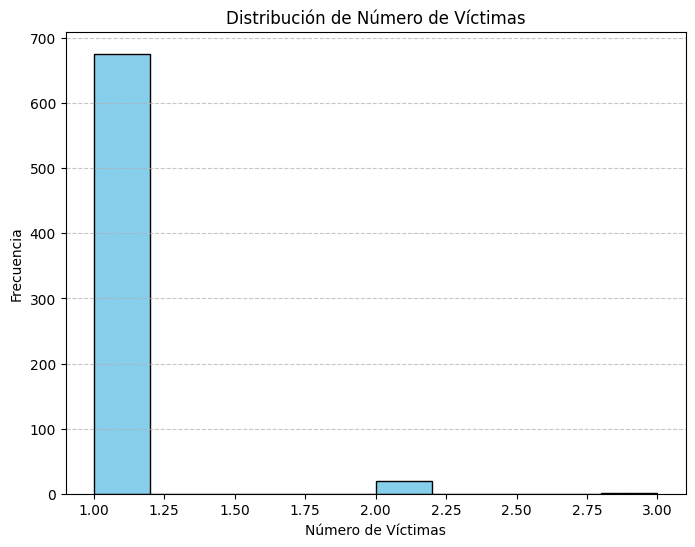

In [9]:
# Crear un histograma de la columna N_VICTIMAS
plt.figure(figsize=(8, 6))
plt.hist(data['N_VICTIMAS'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el histograma
plt.show()


### Busqueda de outliers columna "COMUNA"
No se encontraron outliers en la columna "COMUNA" según el criterio del rango intercuartílico (IQR). Esto significa que todos los valores de la columna "COMUNA" están dentro del rango definido por el IQR y no hay valores extremadamente atípicos en esta columna.

In [10]:
# Cargar el conjunto de datos
data = dataframe.copy()

# Calcular el rango intercuartílico (IQR) para la columna 'COMUNA'
Q1 = data['COMUNA'].quantile(0.25)
Q3 = data['COMUNA'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar filas que cumplen con el criterio de outlier
filas_outliers = data[(data['COMUNA'] < limite_inferior) | (data['COMUNA'] > limite_superior)]

# Mostrar las filas que cumplen con el criterio de outlier
print(filas_outliers)


Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Altura, Cruce, Dirección Normalizada, COMUNA, XY (CABA), pos x, pos y, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []

[0 rows x 21 columns]


Siniestros por Comuna

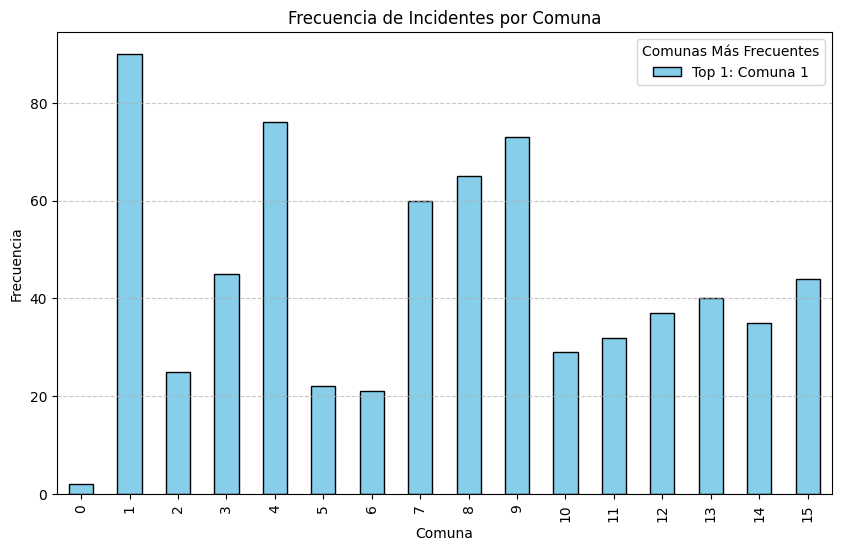

In [28]:
# Calcular la frecuencia de incidentes por comuna y ordenarlas
comuna_counts = data['COMUNA'].value_counts().sort_index()

# Obtener las tres comunas con más accidentes
top_3_comunas = comuna_counts.nlargest(3)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
comuna_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Incidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar la leyenda dentro del cuadro
legend = plt.legend([f'Top {i}: Comuna {comuna}' for i, comuna in enumerate(top_3_comunas.index, start=1)], title='Comunas Más Frecuentes', loc='upper right')

# Mostrar el gráfico
plt.show()




Hacemos un analisis de tendencia en la columna "FECHAS"
* Preparacion de los datos
* Analizamos las tendencias mensuales
* Visualizamos la cantidad de víctimas a lo largo de los meses
* Análisis estadístico calculando la media, mediana y descriptivas mensuales

In [13]:
data_copy = data.copy()
data_copy['FECHA'] = pd.to_datetime(data_copy['FECHA'])
data_copy.set_index('FECHA', inplace=True)


La convertimos a datetime

In [16]:
data_copy = data.copy()
data_copy['FECHA'] = pd.to_datetime(data_copy['FECHA'])
data_copy.set_index('FECHA', inplace=True)


Realizamos un muestreo temporal por meses

In [18]:
data_monthly = data_copy['N_VICTIMAS'].resample('M').sum()


tasa de accidentes por mes

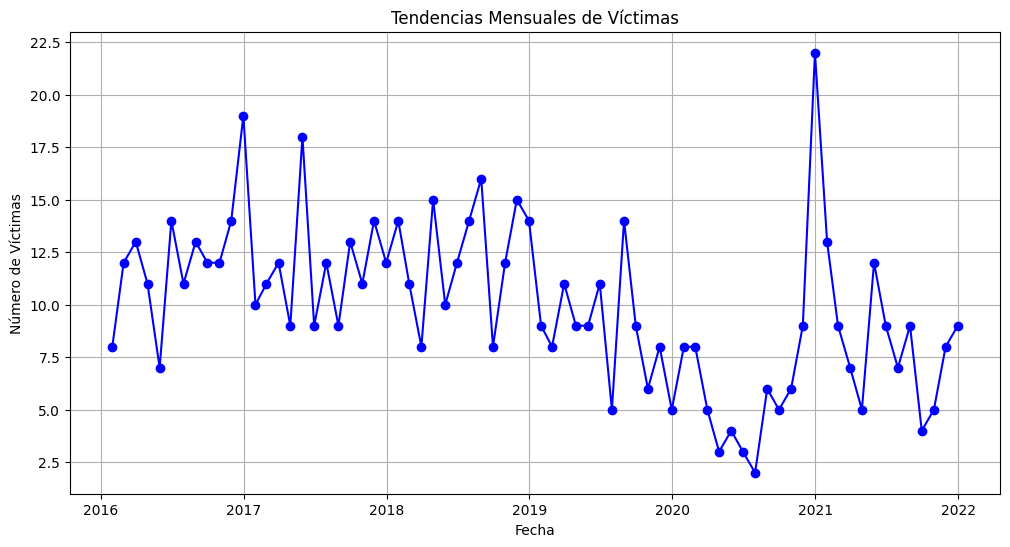

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data_monthly.index, data_monthly.values, marker='o', linestyle='-', color='b')
plt.title('Tendencias Mensuales de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')
plt.grid(True)
plt.show()

Analisis basado en estadistica desciptiva calculando La Media, La Mediana, la desviación estándar, el valor mínimo, el valor máximo y los cuartiles.

In [21]:
# Asegurémonos de que la columna 'FECHA' esté en el formato de fecha adecuado y sea el índice
data['FECHA'] = pd.to_datetime(data['FECHA'])
data.set_index('FECHA', inplace=True)

# Agreguemos los datos mensualmente
data_monthly = data['N_VICTIMAS'].resample('M').sum()

# Calcular la media mensual
media_mensual = data_monthly.mean()

# Calcular la mediana mensual
mediana_mensual = data_monthly.median()

# Calcular otras estadísticas descriptivas
descriptivas_mensuales = data_monthly.describe()

# Imprimir los resultados
print(f"Media Mensual: {media_mensual:.2f}")
print(f"Mediana Mensual: {mediana_mensual}")
print("Estadísticas Descriptivas Mensuales:")
print(descriptivas_mensuales)

Media Mensual: 9.96
Mediana Mensual: 9.0
Estadísticas Descriptivas Mensuales:
count    72.000000
mean      9.958333
std       3.880023
min       2.000000
25%       8.000000
50%       9.000000
75%      12.000000
max      22.000000
Name: N_VICTIMAS, dtype: float64


Participantes con mas accidentes

In [29]:
# Contar la frecuencia de cada valor único en la columna "PARTICIPANTES"
participantes_counts = data['PARTICIPANTES'].value_counts()

# Obtener los participantes con más accidentes (los 5 más comunes, por ejemplo)
top_participantes = participantes_counts.head(5)

# Imprimir los participantes más comunes
print("Participantes con más accidentes:")
print(top_participantes)


Participantes con más accidentes:
PARTICIPANTES
PEATON-PASAJEROS    105
MOTO-AUTO            83
MOTO-CARGAS          78
PEATON-AUTO          77
MOTO-PASAJEROS       46
Name: count, dtype: int64


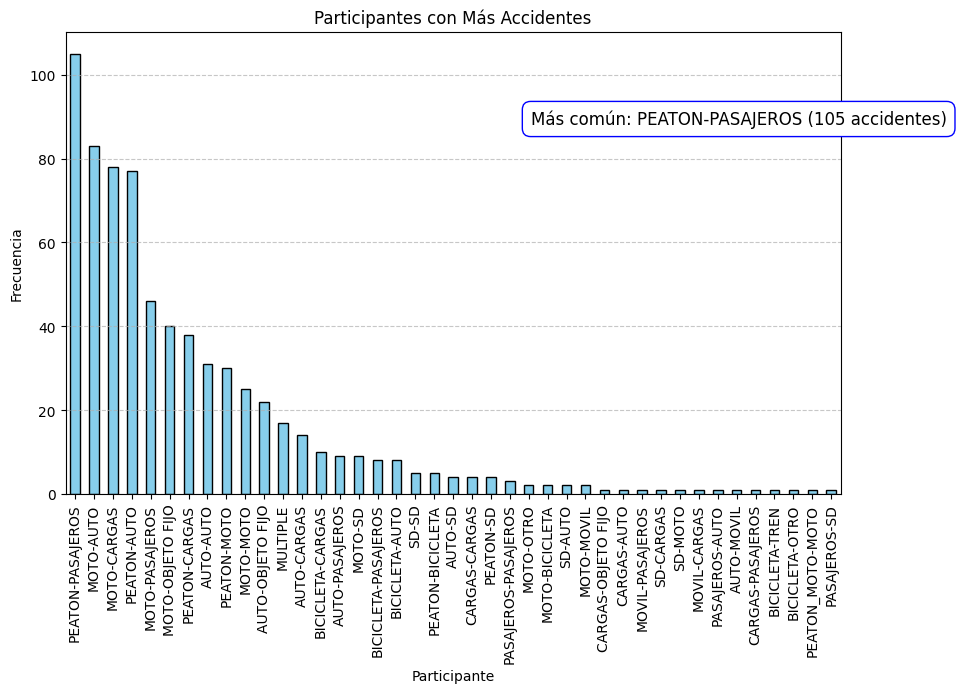

In [31]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada valor único en la columna "PARTICIPANTES"
participantes_counts = data['PARTICIPANTES'].value_counts()

# Obtener los participantes con más accidentes (el más común)
participante_mas_comun = participantes_counts.idxmax()
frecuencia_participante_mas_comun = participantes_counts.max()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
participantes_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Participantes con Más Accidentes')
plt.xlabel('Participante')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar un cuadro con el participante más común
plt.annotate(f'Más común: {participante_mas_comun} ({frecuencia_participante_mas_comun} accidentes)',
             xy=(0.6, 0.8), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", edgecolor="blue", facecolor="white"),
             fontsize=12)

# Mostrar el gráfico
plt.show()



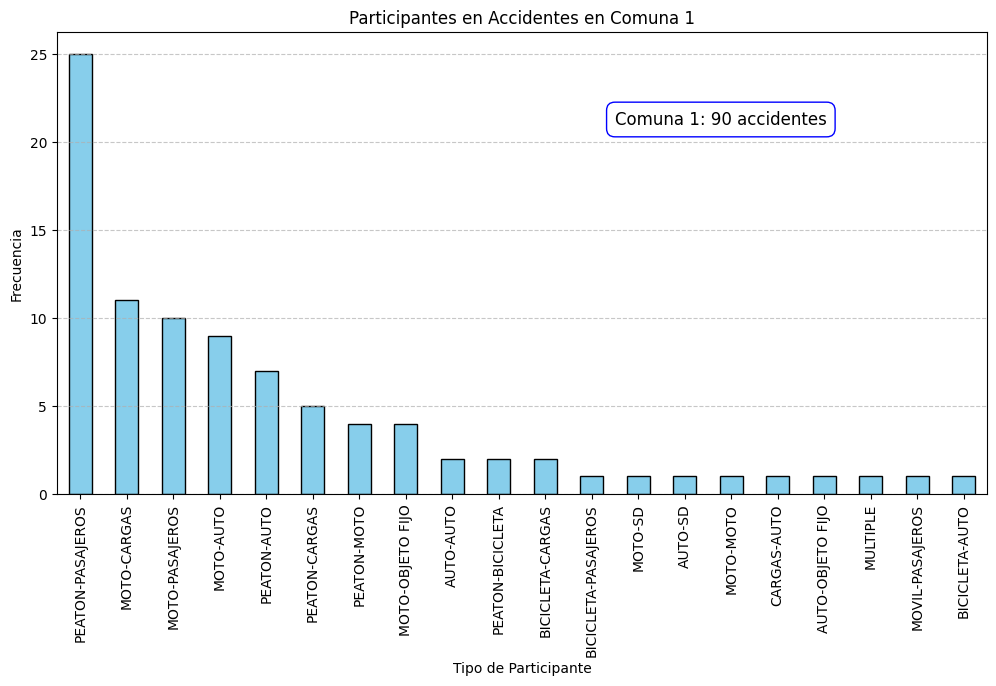

In [33]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada comuna en la columna "COMUNA"
comuna_counts = data['COMUNA'].value_counts()

# Obtener la comuna con más accidentes (la más común)
comuna_mas_comun = comuna_counts.idxmax()

# Filtrar los datos para obtener solo la comuna más común
data_comuna_mas_comun = data[data['COMUNA'] == comuna_mas_comun]

# Contar la frecuencia de participantes en esa comuna
participantes_comuna_mas_comun = data_comuna_mas_comun['PARTICIPANTES'].value_counts()

# Crear un gráfico de barras para mostrar los participantes en la comuna más común
plt.figure(figsize=(12, 6))
participantes_comuna_mas_comun.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Participantes en Accidentes en Comuna {comuna_mas_comun}')
plt.xlabel('Tipo de Participante')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar un cuadro con la comuna más común
plt.annotate(f'Comuna {comuna_mas_comun}: {comuna_counts.max()} accidentes',
             xy=(0.6, 0.8), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", edgecolor="blue", facecolor="white"),
             fontsize=12)

# Mostrar el gráfico
plt.show()



acusados con mas accidentes

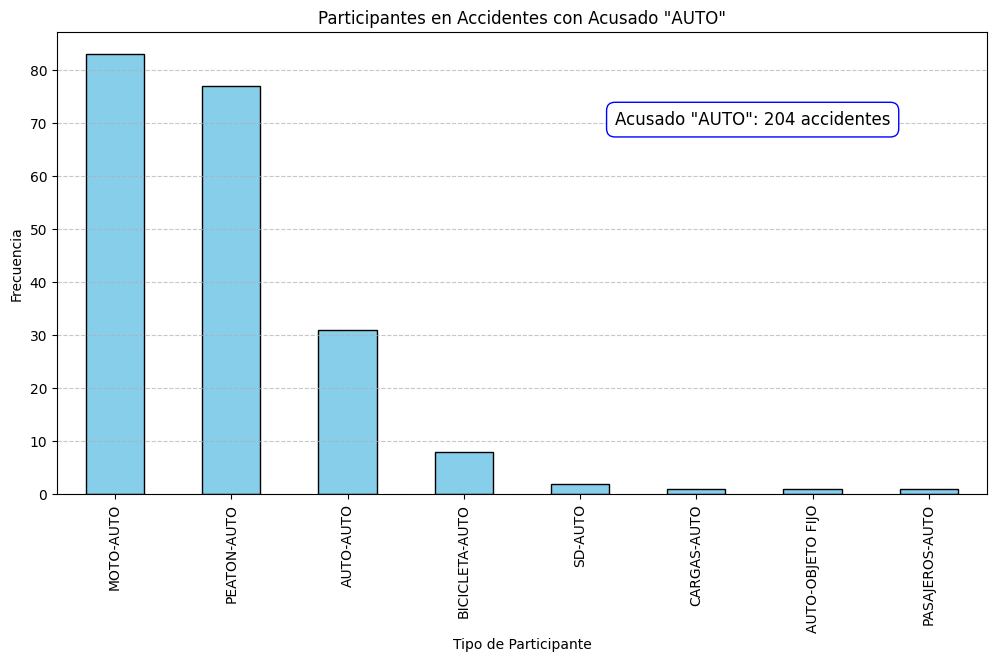

In [34]:
# Contar la frecuencia de cada acusado en la columna "ACUSADO"
acusado_counts = data['ACUSADO'].value_counts()

# Obtener el acusado con más accidentes (el más común)
acusado_mas_comun = acusado_counts.idxmax()

# Filtrar los datos para obtener solo los accidentes en los que el acusado más común está involucrado
data_acusado_mas_comun = data[data['ACUSADO'] == acusado_mas_comun]

# Contar la frecuencia de participantes en esos accidentes
participantes_acusado_mas_comun = data_acusado_mas_comun['PARTICIPANTES'].value_counts()

# Crear un gráfico de barras para mostrar los participantes en los accidentes del acusado más común
plt.figure(figsize=(12, 6))
participantes_acusado_mas_comun.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Participantes en Accidentes con Acusado "{acusado_mas_comun}"')
plt.xlabel('Tipo de Participante')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar un cuadro con el acusado más común
plt.annotate(f'Acusado "{acusado_mas_comun}": {acusado_counts.max()} accidentes',
             xy=(0.6, 0.8), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", edgecolor="blue", facecolor="white"),
             fontsize=12)

# Mostrar el gráfico
plt.show()


Lugar del hecho con mas accidentes

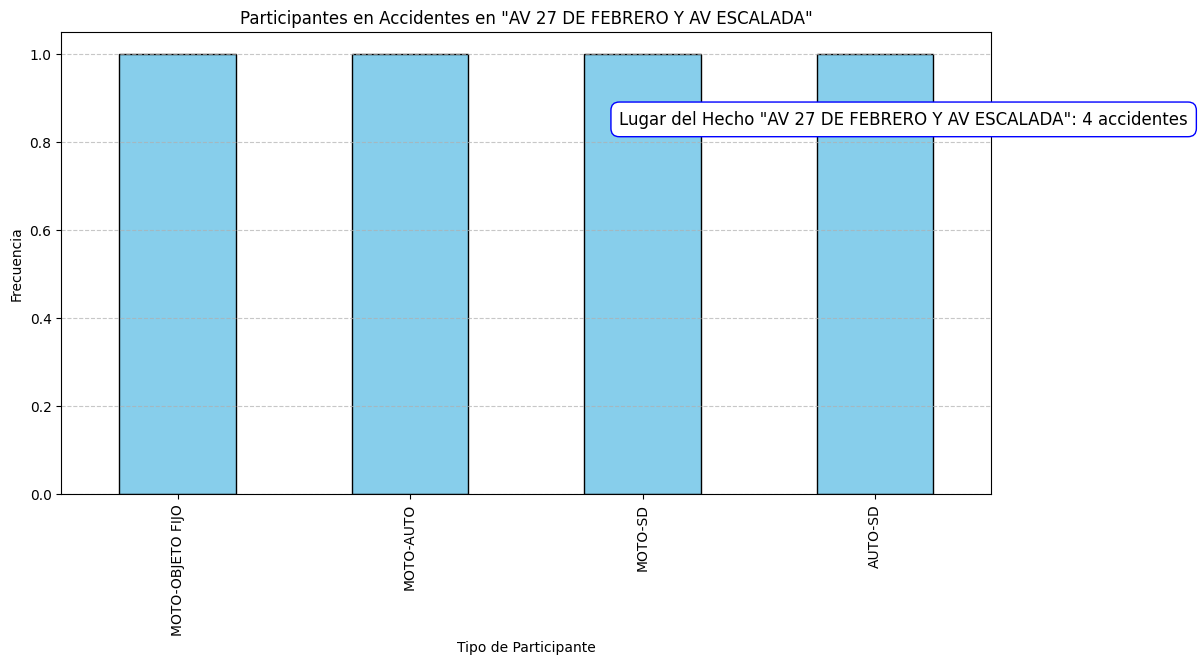

In [35]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada lugar del hecho en la columna "LUGAR_DEL_HECHO"
lugar_counts = data['LUGAR_DEL_HECHO'].value_counts()

# Obtener el lugar del hecho con más accidentes (el más común)
lugar_mas_comun = lugar_counts.idxmax()

# Filtrar los datos para obtener solo los accidentes en el lugar del hecho más común
data_lugar_mas_comun = data[data['LUGAR_DEL_HECHO'] == lugar_mas_comun]

# Contar la frecuencia de participantes en esos accidentes
participantes_lugar_mas_comun = data_lugar_mas_comun['PARTICIPANTES'].value_counts()

# Crear un gráfico de barras para mostrar los participantes en los accidentes en el lugar del hecho más común
plt.figure(figsize=(12, 6))
participantes_lugar_mas_comun.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Participantes en Accidentes en "{lugar_mas_comun}"')
plt.xlabel('Tipo de Participante')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar un cuadro con el lugar del hecho más común
plt.annotate(f'Lugar del Hecho "{lugar_mas_comun}": {lugar_counts.max()} accidentes',
             xy=(0.6, 0.8), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", edgecolor="blue", facecolor="white"),
             fontsize=12)

# Mostrar el gráfico
plt.show()


In [38]:
# Obtener el lugar del hecho con más accidentes (el más común)
lugar_mas_comun = data['LUGAR_DEL_HECHO'].value_counts().idxmax()

# Filtrar los datos para obtener solo los accidentes en el lugar del hecho más común
data_lugar_mas_comun = data[data['LUGAR_DEL_HECHO'] == lugar_mas_comun]

# Agrupar los datos por mes y contar la frecuencia de accidentes en ese lugar por mes
accidentes_por_mes = data_lugar_mas_comun.resample('M').size()

# Obtener el mes con más accidentes en ese lugar
mes_con_mas_accidentes = accidentes_por_mes.idxmax()
cantidad_maxima_accidentes = accidentes_por_mes.max()

# Imprimir el resultado
print(f"Lugar del Hecho con más Accidentes: {lugar_mas_comun}")
print(f"Mes con más Accidentes en {lugar_mas_comun}: {mes_con_mas_accidentes} con {cantidad_maxima_accidentes} accidentes")


Lugar del Hecho con más Accidentes: AV 27 DE FEBRERO Y AV ESCALADA
Mes con más Accidentes en AV 27 DE FEBRERO Y AV ESCALADA: 2016-01-31 00:00:00 con 1 accidentes


victima con mas accidentes

In [39]:
# Encontrar a la víctima con más accidentes
victima_con_mas_accidentes = data['VICTIMA'].value_counts().idxmax()
cantidad_maxima_accidentes_victima = data['VICTIMA'].value_counts().max()

# Imprimir el resultado
print(f"Víctima con más accidentes: {victima_con_mas_accidentes}")
print(f"Cantidad máxima de accidentes para esta víctima: {cantidad_maxima_accidentes_victima}")


Víctima con más accidentes: MOTO
Cantidad máxima de accidentes para esta víctima: 295


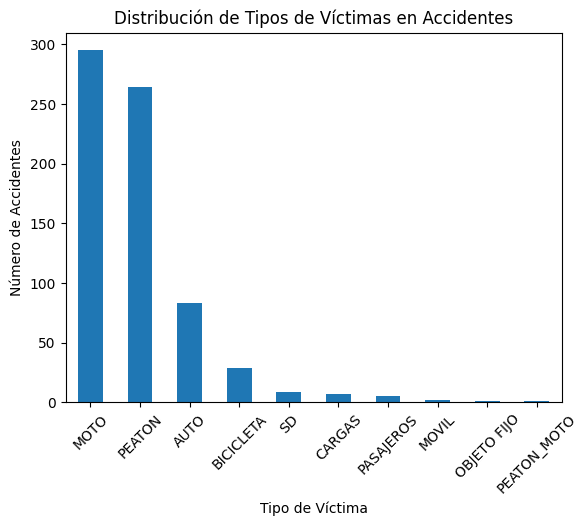

In [44]:
# Suponiendo que deseas graficar la distribución de los tipos de víctimas
import matplotlib.pyplot as plt

# Reemplaza "data" con tu DataFrame que contiene los datos de accidentes
data['VICTIMA'].value_counts().plot(kind='bar')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Número de Accidentes')
plt.title('Distribución de Tipos de Víctimas en Accidentes')
plt.xticks(rotation=45)
plt.show()






Tipo de calle on mas accidentes

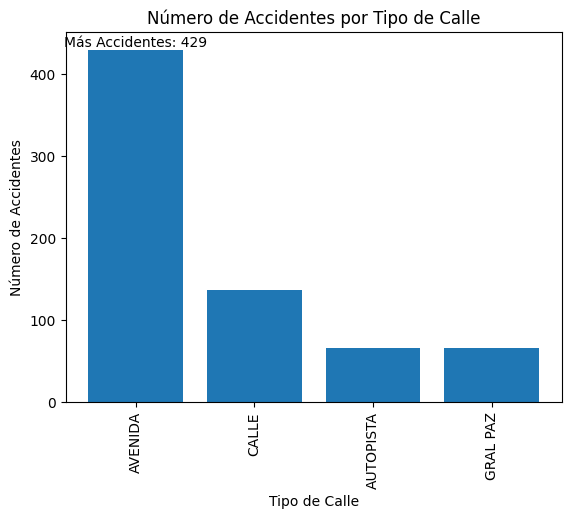

El tipo de calle con más accidentes es 'AVENIDA' con 429 accidentes.


In [45]:
import matplotlib.pyplot as plt

# Obtén la cuenta de accidentes por tipo de calle
tipo_calle_accidentes = data['TIPO_DE_CALLE'].value_counts()

# Encuentra el tipo de calle con más accidentes
tipo_calle_mas_accidentes = tipo_calle_accidentes.idxmax()
cantidad_mas_accidentes = tipo_calle_accidentes.max()

# Grafica los datos
plt.bar(tipo_calle_accidentes.index, tipo_calle_accidentes)
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Accidentes')
plt.title('Número de Accidentes por Tipo de Calle')
plt.xticks(rotation=90)

# Muestra el tipo de calle con más accidentes
plt.text(tipo_calle_mas_accidentes, cantidad_mas_accidentes, f'Más Accidentes: {cantidad_mas_accidentes}', ha='center', va='bottom')

plt.show()

# Imprime el tipo de calle con más accidentes
print(f"El tipo de calle con más accidentes es '{tipo_calle_mas_accidentes}' con {cantidad_mas_accidentes} accidentes.")
